# Import Libraries

In [222]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

The **CO2 EMISSIONS (g/km)** column is the dependent column, and the rest are the independent columns.

In [223]:
df = pd.read_csv("FuelConsumptionCo2.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [224]:
print(f'The shape of the data frame : {df.shape}')

The shape of the data frame : (1067, 13)


In [225]:
df.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [226]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [227]:
df.duplicated().sum()

0

In [228]:
df = df[
    ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
     'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']
]

df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


# Exercise 1 : Histogram

Plot a Histogram for the following columns :-

1. CO2EMISSIONS
2. CYLINDERS
3. ENGINESIZE
4. FUELCONSUMPTION_COMB
5. FUELCONSUMPTION_CITY
6. FUELCONSUMPTION_HWY
7. FUELCONSUMPTION_COMB_MPG

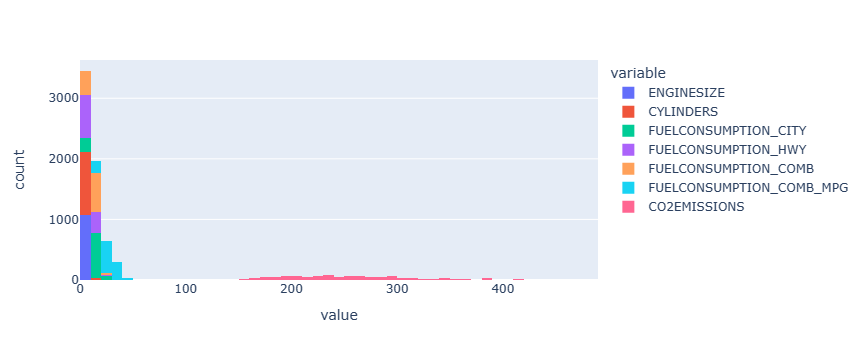

In [229]:
px.histogram(df, x=['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 
                    'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'])

# Exercise 2 : Scatter Plots

Plot 7 scatter plots, the 6 X features with CO2EMISSIONS.

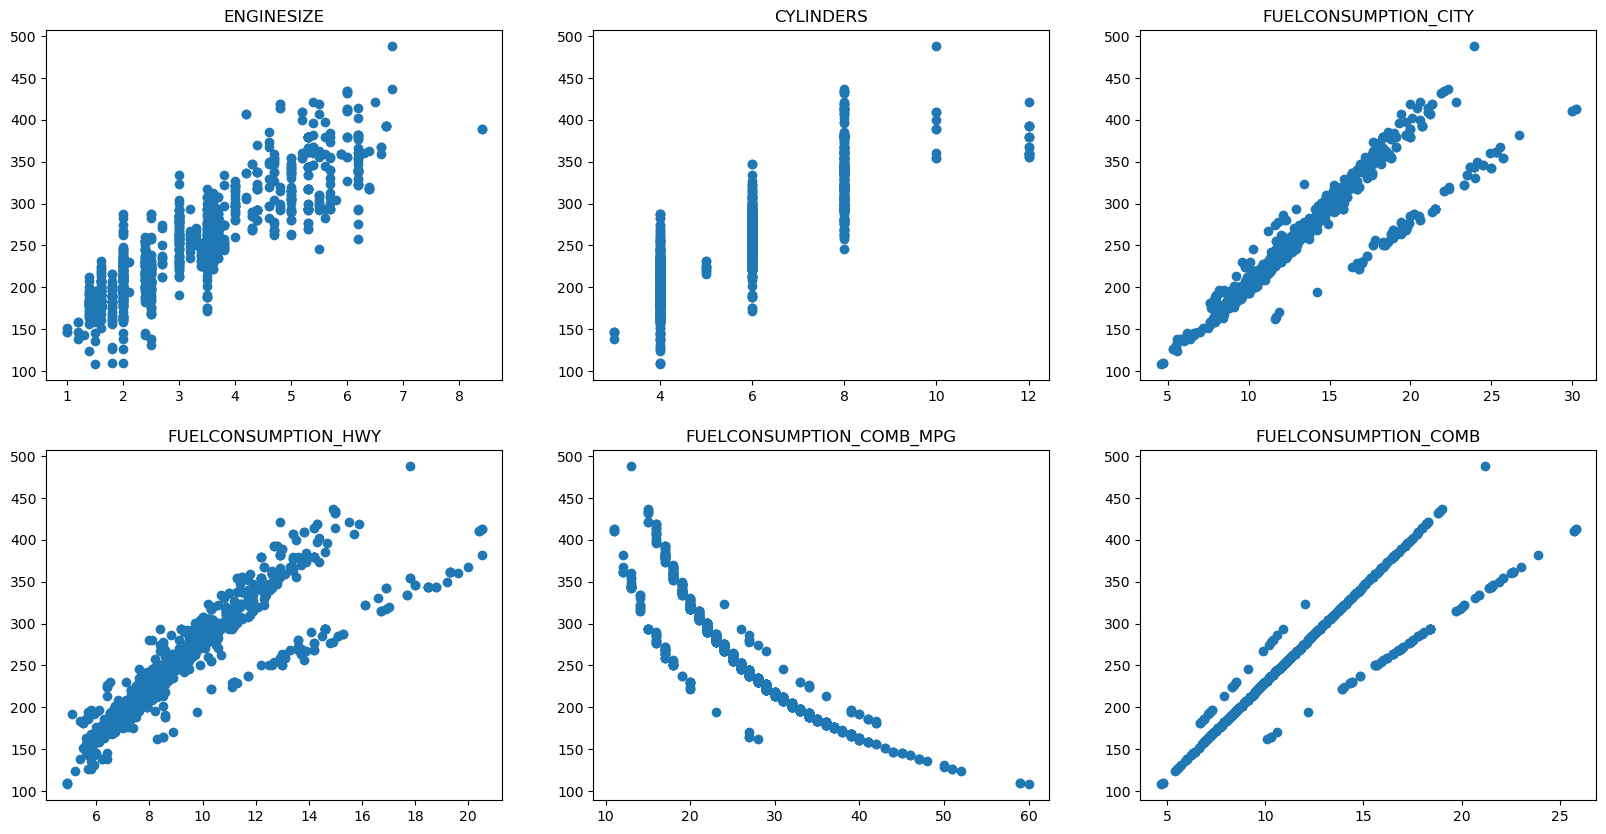

In [230]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

axs[0, 0].scatter(x= df['ENGINESIZE'], y = df['CO2EMISSIONS'])
axs[0, 0].set_title('ENGINESIZE')

axs[0, 1].scatter(x= df['CYLINDERS'], y = df['CO2EMISSIONS'])
axs[0, 1].set_title('CYLINDERS')

axs[0, 2].scatter(x= df['FUELCONSUMPTION_CITY'], y = df['CO2EMISSIONS'])
axs[0, 2].set_title('FUELCONSUMPTION_CITY')

axs[1, 0].scatter(x= df['FUELCONSUMPTION_HWY'], y = df['CO2EMISSIONS'])
axs[1, 0].set_title('FUELCONSUMPTION_HWY')

axs[1, 1].scatter(x= df['FUELCONSUMPTION_COMB_MPG'], y = df['CO2EMISSIONS'])
axs[1, 1].set_title('FUELCONSUMPTION_COMB_MPG')

axs[1, 2].scatter(x= df['FUELCONSUMPTION_COMB'], y = df['CO2EMISSIONS'])
axs[1, 2].set_title('FUELCONSUMPTION_COMB')

plt.show();

# Exercise 3 : Box Plots

Plot 6 box plots for :-
1. CYLINDERS
2. ENGINESIZE
3. FUELCONSUMPTION_COMB
4. FUELCONSUMPTION_CITY
5. FUELCONSUMPTION_HWY
6. FUELCONSUMPTION_COMB_MPG

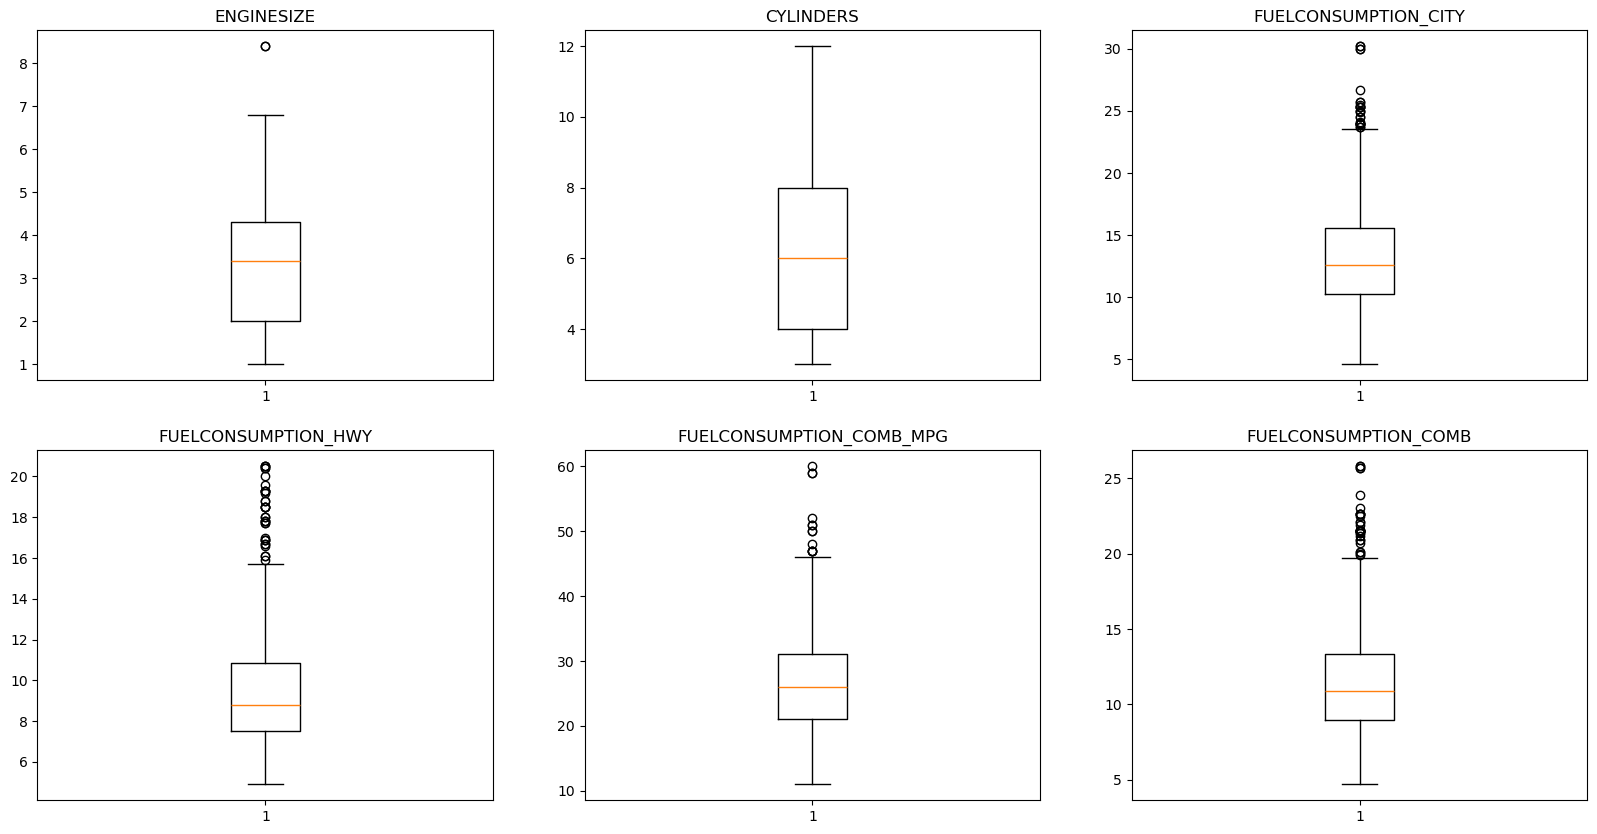

In [231]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

axs[0, 0].boxplot(df['ENGINESIZE'])
axs[0, 0].set_title('ENGINESIZE')

axs[0, 1].boxplot(df['CYLINDERS'])
axs[0, 1].set_title('CYLINDERS')

axs[0, 2].boxplot(df['FUELCONSUMPTION_CITY'])
axs[0, 2].set_title('FUELCONSUMPTION_CITY')

axs[1, 0].boxplot(df['FUELCONSUMPTION_HWY'])
axs[1, 0].set_title('FUELCONSUMPTION_HWY')

axs[1, 1].boxplot(df['FUELCONSUMPTION_COMB_MPG'])
axs[1, 1].set_title('FUELCONSUMPTION_COMB_MPG')

axs[1, 2].boxplot(df['FUELCONSUMPTION_COMB'])
axs[1, 2].set_title('FUELCONSUMPTION_COMB')

plt.show();

# Exercise 4 : Remove Outliers

Then plot a box plot to check if the outliers was removed or not.

In [232]:
def limits(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    print("Upper Bound:",upper)   
    print("Lower Bound:",lower)
    return upper, lower


print("ENGINESIZE")
ENGupper, ENGlower = limits(df['ENGINESIZE'])
outliers = df[(df['ENGINESIZE'] < ENGlower) | (df['ENGINESIZE'] > ENGupper)]
df = df.drop(outliers.index)
print("--------------------")
print("CYLINDERS")
CYLupper, CYLlower = limits(df['CYLINDERS'])
outliers = df[(df['CYLINDERS'] < CYLlower) | (df['CYLINDERS'] > CYLupper)]
df = df.drop(outliers.index)
print("--------------------")
print("FUELCONSUMPTION_CITY")
CITYupper, CITYlower = limits(df['FUELCONSUMPTION_CITY'])
outliers = df[(df['FUELCONSUMPTION_CITY'] < CITYlower) | (df['FUELCONSUMPTION_CITY'] > CITYupper)]
df = df.drop(outliers.index)
print("--------------------")
print("FUELCONSUMPTION_HWY")
HWYupper, HWYlower = limits(df['FUELCONSUMPTION_HWY'])
outliers = df[(df['FUELCONSUMPTION_HWY'] < HWYlower) | (df['FUELCONSUMPTION_HWY'] > HWYupper)]
df = df.drop(outliers.index)
print("--------------------")
print("FUELCONSUMPTION_COMB")
COMBupper, COMBlower = limits(df['FUELCONSUMPTION_COMB'])
outliers = df[(df['FUELCONSUMPTION_COMB'] < COMBlower) | (df['FUELCONSUMPTION_COMB'] > COMBupper)]
df = df.drop(outliers.index)
print("--------------------")
print("FUELCONSUMPTION_COMB_MPG")
MPGupper, MPGlower = limits(df['FUELCONSUMPTION_COMB_MPG'])
outliers = df[(df['FUELCONSUMPTION_COMB_MPG'] < MPGlower) | (df['FUELCONSUMPTION_COMB_MPG'] > MPGupper)]
df = df.drop(outliers.index)

ENGINESIZE
Upper Bound: 7.75
Lower Bound: -1.4499999999999997
--------------------
CYLINDERS
Upper Bound: 14.0
Lower Bound: -2.0
--------------------
FUELCONSUMPTION_CITY
Upper Bound: 23.450000000000003
Lower Bound: 2.2499999999999982
--------------------
FUELCONSUMPTION_HWY
Upper Bound: 14.75
Lower Bound: 3.1499999999999995
--------------------
FUELCONSUMPTION_COMB
Upper Bound: 18.5375
Lower Bound: 3.237499999999998
--------------------
FUELCONSUMPTION_COMB_MPG
Upper Bound: 45.125
Lower Bound: 8.125


In [233]:
df.shape

(1001, 7)

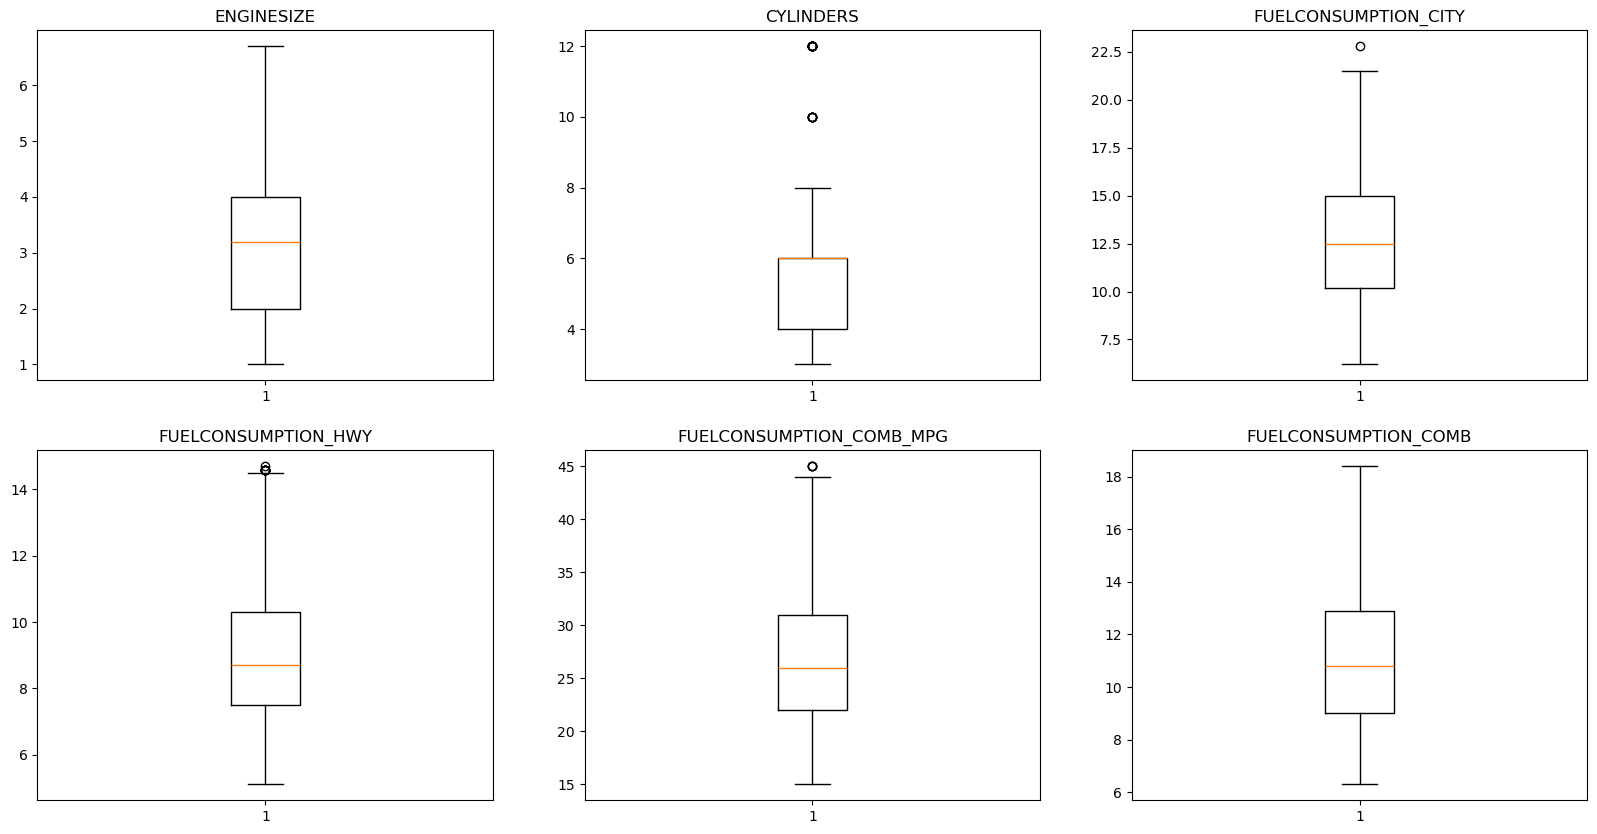

In [234]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

axs[0, 0].boxplot(df['ENGINESIZE'])
axs[0, 0].set_title('ENGINESIZE')

axs[0, 1].boxplot(df['CYLINDERS'])
axs[0, 1].set_title('CYLINDERS')

axs[0, 2].boxplot(df['FUELCONSUMPTION_CITY'])
axs[0, 2].set_title('FUELCONSUMPTION_CITY')

axs[1, 0].boxplot(df['FUELCONSUMPTION_HWY'])
axs[1, 0].set_title('FUELCONSUMPTION_HWY')

axs[1, 1].boxplot(df['FUELCONSUMPTION_COMB_MPG'])
axs[1, 1].set_title('FUELCONSUMPTION_COMB_MPG')

axs[1, 2].boxplot(df['FUELCONSUMPTION_COMB'])
axs[1, 2].set_title('FUELCONSUMPTION_COMB')

plt.show();

# Exercise 5 : Train and Test Split

Split the features in X variable and target in the Y variable.

Then use train_test_split method to split the dataset into train and test sets.

The test set have 20% of the dataset and the random state is 42.

In [235]:
from sklearn.model_selection import train_test_split 

x= df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 
       'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']]

y=df['CO2EMISSIONS'] 

X_train, X_test, y_train, y_test = train_test_split(x,y , 
                                   random_state=42,  
                                   test_size=0.20,  
                                   shuffle=True) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 6)
(201, 6)
(800,)
(201,)


# Exercise 4 : Simple Linear Regression.

Train a simple linear regression

X = Engine Size.
Y = Emission.

What is the coefficients and y intercept?

In [251]:
x= np.array(df['ENGINESIZE']).reshape(-1, 1)
y= np.array(df['CO2EMISSIONS'] ).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                   random_state=42,  
                                   test_size=0.20,  
                                   shuffle=True) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 1)
(201, 1)
(800, 1)
(201, 1)


In [252]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
 
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

wight = regr.coef_
bias = regr.intercept_
print('Cofficients:', wight, "Y intercept:", bias)

0.7489132161305907
Cofficients: [[36.49207556]] Y intercept: [132.81709141]


# Exercise 5 : Plot the Output

Plot linear regression model (output).

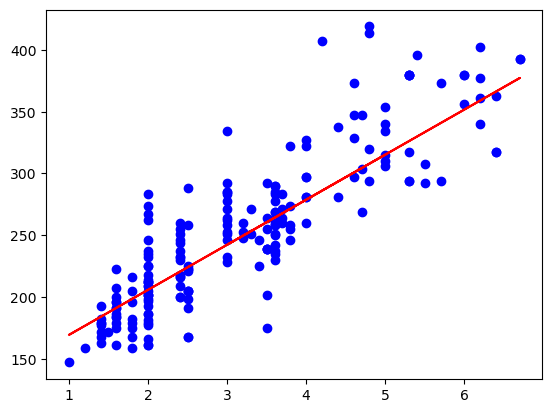

In [253]:
y_pred = regr.predict(X_test)

plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='r')
 
plt.show()

# Exercise 6 : Evaluation

Evaluate the model using MSE, RMSE, MAE, and R^2.

In [255]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = regr.predict(X_test) 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
 
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)

MAE: 23.228560697100626
MSE: 993.3233809468677
RMSE: 31.5170331875776
R^2: 0.7489132161305907


# Exercise 7 : Repeat 4, 5, and 6

Repeat the steps 4, 5, and 6.

For the rest features (CYLINDERS, FUELCONSUMPTION_COMB, FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY) and then sort the models based on the best performance.

Note : Do not train the FUELCONSUMPTION_COMB_MPG.

In [256]:
print('CYLINDERS')
x= np.array(df['CYLINDERS']).reshape(-1, 1)
y= np.array(df['CO2EMISSIONS'] ).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                   random_state=42,  
                                   test_size=0.20,  
                                   shuffle=True) 
regr = LinearRegression()
 
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

wight = regr.coef_
bias = regr.intercept_
print('wight:', wight, "bias:", bias)
 
print('-'*20)

y_pred = regr.predict(X_test)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
 
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)

CYLINDERS
0.7073513251331986
wight: [[27.58764406]] bias: [94.38426865]
--------------------
MAE: 26.010967834147266
MSE: 1157.746204991429
RMSE: 34.02566979489793
R^2: 0.7073513251331986


In [257]:
print('FUELCONSUMPTION_COMB')
x= np.array(df['FUELCONSUMPTION_COMB']).reshape(-1, 1)
y= np.array(df['CO2EMISSIONS'] ).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                   random_state=42,  
                                   test_size=0.20,  
                                   shuffle=True) 

regr = LinearRegression()
 
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

wight = regr.coef_
bias = regr.intercept_
print('wight:', wight, "bias:", bias)

print('-'*20)

y_pred = regr.predict(X_test) 
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
 
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)

FUELCONSUMPTION_COMB
0.8903443737309467
wight: [[18.58776501]] bias: [44.12356349]
--------------------
MAE: 12.954965255839928
MSE: 433.8081668291773
RMSE: 20.82806200368093
R^2: 0.8903443737309467


In [258]:
print('FUELCONSUMPTION_CITY')
x= np.array(df['FUELCONSUMPTION_CITY']).reshape(-1, 1)
y= np.array(df['CO2EMISSIONS'] ).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                   random_state=42,  
                                   test_size=0.20,  
                                   shuffle=True) 

regr = LinearRegression()
 
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

wight = regr.coef_
bias = regr.intercept_
print('wight:', wight, "bias:", bias)

print('-'*20)
y_pred = regr.predict(X_test)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
 
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)

FUELCONSUMPTION_CITY
0.8814164775799984
wight: [[15.42956194]] bias: [53.45337184]
--------------------
MAE: 13.548707560248639
MSE: 469.12777964485946
RMSE: 21.659357784681877
R^2: 0.8814164775799984


In [259]:
print('FUELCONSUMPTION_HWY')
x= np.array(df['FUELCONSUMPTION_HWY']).reshape(-1, 1)
y= np.array(df['CO2EMISSIONS'] ).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                   random_state=42,  
                                   test_size=0.20,  
                                   shuffle=True) 

regr = LinearRegression()
 
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

wight = regr.coef_
bias = regr.intercept_
print('wight:', wight, "bias:", bias)

print('-'*20)
y_pred = regr.predict(X_test)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
 
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)

FUELCONSUMPTION_HWY
0.858112133093962
wight: [[23.33455849]] bias: [39.32172959]
--------------------
MAE: 16.2558556375037
MSE: 561.321999901629
RMSE: 23.69223501279753
R^2: 0.858112133093962


# Exercise 8 : Multiple Linear Regression

Train one linear regression model with the following features :-

1. CYLINDERS
2. ENGINESIZE
3. FUELCONSUMPTION_COMB
4. FUELCONSUMPTION_CITY
5. FUELCONSUMPTION_HWY

In [260]:
from sklearn.preprocessing import PolynomialFeatures

X= df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 
       'FUELCONSUMPTION_COMB']]
y= df['CO2EMISSIONS']

degree = 2
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [261]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 23.69223501279753
